mean shift : 밀도 기반 클러스터링

In [1]:
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift

In [2]:
iris = load_iris()
iris_pca =PCA(n_components=2).fit_transform(iris.data)

In [ ]:
# bandwidth : 커널함수의 영역 (대역폭)
model = MeanShift()

In [4]:
model.fit(iris_pca)

MeanShift()

In [5]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
model.cluster_centers_

array([[ 1.17642311, -0.12033282],
       [-2.64344511,  0.19056564]])

<Axes: >

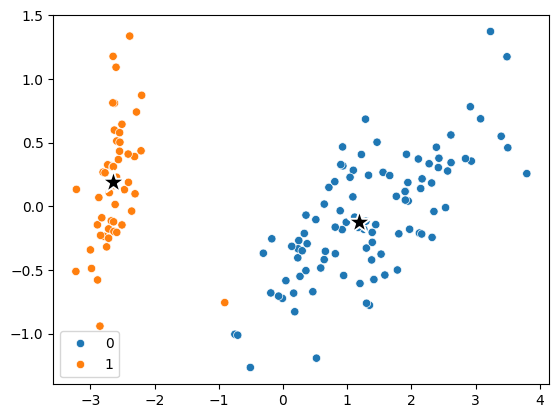

In [8]:
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:, 1], hue=model.labels_)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:, 1],
                color="k", marker="*", s=300)

mean(평균) 을 구해서 shift (이동)

시작 포인트에서 bandwidth(대역폭) 안의 밀도를 구함 (KDE - Kernel Density Esitimation, 커널 밀도 추정)

- 커널밀도 추정을 통해 커널 밀도 함수를 구하고, 밀도가 높은 쪽으로 이동
- 더 이상 움직이지 않으면 학습 종료

점을 기준으로 구간안에서 밀도를 구하고 밀도가 높은 쪽으로 해당 중심점을 이동시킨다.